In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv("train.csv")


In [2]:
data = data.drop(['Name','Ticket','Cabin'],axis=1)

In [3]:
data['Sex'] = data['Sex'].map(dict(zip(['male','female'],[1,0])))

In [4]:
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)

In [5]:
data = data.dropna(subset=['Embarked'])

In [6]:

median = data['Age'].median()
data['Age'] = data['Age'].fillna(median)

In [7]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0.0
1,2,1,1,0,38.0,1,0,71.2833,1.0
2,3,1,3,0,26.0,0,0,7.9250,0.0
3,4,1,1,0,35.0,1,0,53.1000,0.0
4,5,0,3,1,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,0.0
887,888,1,1,0,19.0,0,0,30.0000,0.0
888,889,0,3,0,28.0,1,2,23.4500,0.0
889,890,1,1,1,26.0,0,0,30.0000,1.0


In [8]:
#data.describe()

In [9]:
lable = data['Survived'].copy()
attri = data.drop('Survived',axis=1)


In [10]:
#attri = attri1.drop('PassengerId',axis=1)

In [11]:
attri

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.0,1,0,7.2500,0.0
1,2,1,0,38.0,1,0,71.2833,1.0
2,3,3,0,26.0,0,0,7.9250,0.0
3,4,1,0,35.0,1,0,53.1000,0.0
4,5,3,1,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...
886,887,2,1,27.0,0,0,13.0000,0.0
887,888,1,0,19.0,0,0,30.0000,0.0
888,889,3,0,28.0,1,2,23.4500,0.0
889,890,1,1,26.0,0,0,30.0000,1.0


In [12]:
from sklearn.linear_model import LogisticRegression  #0.74,0.798650            #3
#from sklearn.tree import DecisionTreeClassifier     #1.0 overfitting
from xgboost import XGBClassifier                   # 1.0,0.9988               #1
#from sklearn.ensemble import RandomForestClassifier   #1.0 overfitting
#from sklearn.ensemble import ExtraTreesClassifier    #1.0 overfitting
from sklearn.ensemble import AdaBoostClassifier  #0.8,0.83                     #2
from sklearn.naive_bayes import GaussianNB      #0.74,0.793025                 #4
from sklearn.neighbors import KNeighborsClassifier #0.76,0.7525309336332958    #5
#from sklearn.svm import LinearSVC               #0.74,0.726659
#from sklearn.linear_model import SGDClassifier  #0.72,0.6265


model =XGBClassifier ()
model.fit(attri,lable)


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [13]:
test = pd.read_csv("test.csv")


In [14]:
test = test.drop(['Name','Ticket','Cabin',],axis=1)

In [15]:
test['Sex'] = test['Sex'].map(dict(zip(['male','female'],[1,0])))

In [16]:
test['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)

In [17]:
median = test['Fare'].median()
test['Fare'] = test['Fare'].fillna(median)

In [18]:
median = test['Age'].median()
test['Age'] = test['Age'].fillna(median)

In [19]:
from sklearn.metrics import accuracy_score
#acc = accuracy_score(pre,lable_data)

In [20]:
pre = model.predict(attri)

In [21]:

from sklearn.model_selection import cross_val_score
scores  = cross_val_score(model,attri,lable,cv=10)
scores



array([0.74157303, 0.70786517, 0.75280899, 0.56179775, 0.7752809 ,
       0.82022472, 0.80898876, 0.73033708, 0.83146067, 0.80681818])

In [22]:
scores.mean()

0.7537155260469868

In [23]:
#scores.std()

In [24]:
from sklearn.metrics import accuracy_score,mean_squared_error
acc = accuracy_score(pre,lable)
mse = mean_squared_error(pre,lable)

In [25]:
acc

0.9988751406074241

In [26]:
from sklearn import metrics
cnf_metrix = metrics.confusion_matrix(pre,lable)
cnf_metrix

array([[549,   1],
       [  0, 339]], dtype=int64)

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

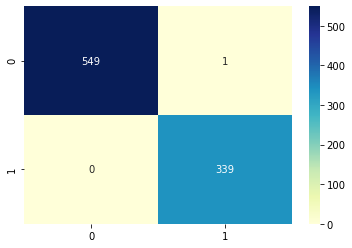

In [28]:
sns.heatmap(pd.DataFrame(cnf_metrix),annot=True,cmap="YlGnBu",fmt='g')
#y_axis=actual
#x_axis=predicted




In [29]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,2
1,893,3,0,47.0,1,0,7.0000,0
2,894,2,1,62.0,0,0,9.6875,2
3,895,3,1,27.0,0,0,8.6625,0
4,896,3,0,22.0,1,1,12.2875,0
...,...,...,...,...,...,...,...,...
413,1305,3,1,27.0,0,0,8.0500,0
414,1306,1,0,39.0,0,0,108.9000,1
415,1307,3,1,38.5,0,0,7.2500,0
416,1308,3,1,27.0,0,0,8.0500,0


In [30]:
prediction = model.predict(test)

In [31]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,

In [32]:
#df = pd.DataFrame(prediction)
#df.to_csv('F_prediction.csv',index=True)